In [8]:
from data_loader import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#we will load datasets first
data_loader = DataLoader("D:\Deloitte\DIH-X-AUC-Hackathon\data\Inventory Management")
additions_on_food = data_loader.load_csv('dim_add_ons.csv') #it contains the price and status and id and category and if it is deleted or not
campaigns_offers = data_loader.load_csv('dim_campaigns.csv') #it contains campaigns (offers) and their places and if it is active or not
stock_items_info = data_loader.load_csv('dim_items.csv')  #it contains items and if there is delivery or takeaway and if it is there and 
#types of additions and if it is displayed for customers
menu_additions = data_loader.load_csv('dim_menu_item_add_ons.csv') #specific add_ons to menu and the price and all are active
menu_items_info = data_loader.load_csv('dim_menu_items.csv') #it contains price and rating and votes and if it is acitve
places_info = data_loader.load_csv("dim_places.csv") #it contains  places and if it is bankrupt and visit_duration and vip threshold
#and waiting_time and binding_period and their title
stock_internal_measuring_units = data_loader.load_csv("dim_skus.csv") #units for measuring stock
stock_categories = data_loader.load_csv("dim_stock_categories.csv") #stock categories ids and titles
taxonomy_terms = data_loader.load_csv("dim_taxonomy_terms.csv") #contains ids that translates into vocab (male,female,bar,cafe,lounge)
users_info = data_loader.load_csv("dim_users.csv") #if account closed,name,country,currency,points,savings,and the role
bonus_codes = data_loader.load_csv("fct_bonus_codes.csv") #bonus ids, points, and duration
campaigns_info = data_loader.load_csv("fct_campaigns.csv") #campaigns titles and items, delivery, what original campaing,the place
#and redemptions and redemptions per_customer and if it is active or not.
#cash_balances = data_loader.load_csv("fct_cash_balances.csv")
#cash_balances.head() #it shows transactions and opening and closing balances
invoice_items = data_loader.load_csv("fct_invoice_items.csv") #it shows specific items with the amount (tablets)
order_items_info = data_loader.load_csv("fct_order_items.csv") #order_tiems and cost, commision, discount, points earned, redeemed,
#quanity, price and status and id of orders and title
orders_info  = data_loader.load_csv("fct_orders.csv") #orders cash amount, cashier, channel, points earned and redeemed, promise_time,
#source and status and total amount and type (takeaway or eat in)
most_ordered = data_loader.load_csv("most_ordered.csv") #most ordered items and count


<>:2: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
<>:2: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
C:\Users\mahmo\AppData\Local\Temp\ipykernel_19752\1151139243.py:2: SyntaxWarning: "\D" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\D"? A raw string is also an option.
  data_loader = DataLoader("D:\Deloitte\DIH-X-AUC-Hackathon\data\Inventory Management")


FileNotFoundError: File not found: D:\Deloitte\DIH-X-AUC-Hackathon\data\Inventory Management/dim_add_ons.csv

In [ ]:
#ideas got: campaigns need to be activated and deactivated, best and worst places,

In [ ]:
stock_items_info['title'].unique()

array(['The Classic', 'The Rudimental', 'The Garden', ...,
       'Cocktails 2 for 1', 'irish coffe  2 for 1',
       'gin and tonic 2 for 1'], dtype=object)

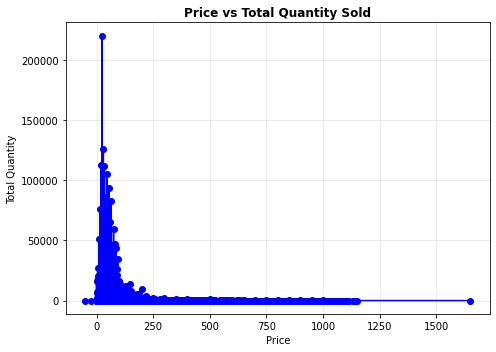


Price Analysis Summary:
        quantity  order_count
price                        
-50.00        17           17
-23.00         8            7
-1.00         10            2
 0.00      16290         8821
 0.01         18           18
 0.10         16           13
 0.25         28           28
 0.28          1            1
 0.30          1            1
 0.34          2            2
25.0 220222


In [ ]:
# Plot prices vs quantity/value
import matplotlib.pyplot as plt

# Group by price and count the orders (quantity/volume)
price_analysis = order_items_info.groupby("price").agg({
    "quantity": "sum",  # Total quantity sold at each price
    "price": "count"    # Number of orders at each price
}).rename(columns={"price": "order_count"})

# Create figure with subplots
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# Plot 1: Price vs Total Quantity Sold
price_analysis["quantity"].plot(kind="line", ax=ax, marker='o', color='blue')
ax.set_title("Price vs Total Quantity Sold", fontsize=12, fontweight='bold')
ax.set_xlabel("Price")
ax.set_ylabel("Total Quantity")
ax.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

print("\nPrice Analysis Summary:")
print(price_analysis.head(10))
print(price_analysis.index[np.argmax(price_analysis["quantity"])],price_analysis["quantity"].max())

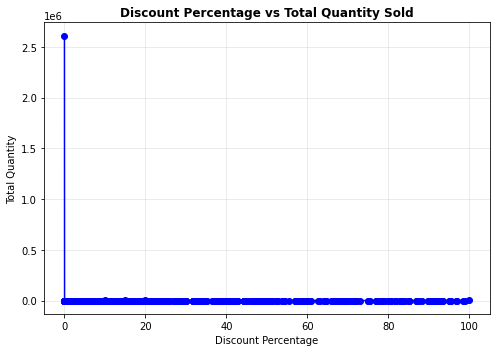


Discount Percentage Analysis Summary:
                     quantity  order_count
discount_percentage                       
0.000000              2611014      1952910
0.005208                    8            1
0.007276                    2            1
0.007353                    8            2
0.007353                    2            2
0.009524                    3            1
0.010417                    4            1
0.012500                    6            2
0.013889                    3            1
0.019231                    1            1
0.0 2611014


In [ ]:
# Plot prices vs quantity/value
import matplotlib.pyplot as plt
#creating discount_percentage column
order_items_info['discount_percentage'] = (order_items_info['discount_amount'] / (order_items_info['price'] * order_items_info['quantity'])) * 100
# Group by price and count the orders (quantity/volume)
price_analysis = order_items_info.groupby("discount_percentage").agg({
    "quantity": "sum",  # Total quantity sold at each price
    "price": "count"    # Number of orders at each price
}).rename(columns={"price": "order_count"})

# Create figure with subplots
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# Plot 1: Price vs Total Quantity Sold
price_analysis["quantity"].plot(kind="line", ax=ax, marker='o', color='blue')
ax.set_title("Discount Percentage vs Total Quantity Sold", fontsize=12, fontweight='bold')
ax.set_xlabel("Discount Percentage")
ax.set_ylabel("Total Quantity")
ax.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

print("\nDiscount Percentage Analysis Summary:")
print(price_analysis.head(10))
print(price_analysis.index[np.argmax(price_analysis["quantity"])],price_analysis["quantity"].max())

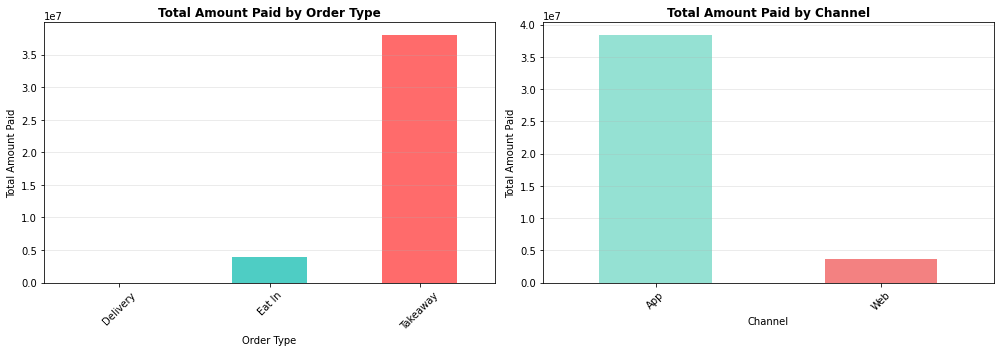


ORDERS ANALYSIS BY TYPE
                  sum        mean   count
type                                     
Delivery      1556.00  172.888889       9
Eat In     4007016.69  345.790187   11588
Takeaway  38034825.47  117.530369  323617

ORDERS ANALYSIS BY CHANNEL
                 sum        mean   count
channel                                 
App      38415981.24  124.660025  308166
Web       3627416.92  134.110356   27048


In [ ]:
# Comparison plots for orders_info: Amount paid by Type and Channel
import matplotlib.pyplot as plt
import pandas as pd

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Amount paid by Order Type (Takeaway vs Eat In)
type_analysis = orders_info.groupby("type")["total_amount"].agg(['sum', 'mean', 'count'])
type_analysis['sum'].plot(kind="bar", ax=ax1, color=['#FF6B6B', '#4ECDC4'])
ax1.set_title("Total Amount Paid by Order Type", fontsize=12, fontweight='bold')
ax1.set_xlabel("Order Type")
ax1.set_ylabel("Total Amount Paid")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Amount paid by Channel
channel_analysis = orders_info.groupby("channel")["total_amount"].agg(['sum', 'mean', 'count'])
channel_analysis['sum'].plot(kind="bar", ax=ax2, color=['#95E1D3', '#F38181', '#AA96DA'])
ax2.set_title("Total Amount Paid by Channel", fontsize=12, fontweight='bold')
ax2.set_xlabel("Channel")
ax2.set_ylabel("Total Amount Paid")
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("ORDERS ANALYSIS BY TYPE")
print("="*60)
print(type_analysis)
print("\n" + "="*60)
print("ORDERS ANALYSIS BY CHANNEL")
print("="*60)
print(channel_analysis)

In [ ]:
#fix some issue for dim_menu_items
#menu_items_info = data_loader.load_csv('dim_menu_items.csv')
menu_items_info.drop('Unnamed: 12',axis=1,inplace=True)
menu_items_info.dropna(inplace=True)
menu_items_info['created'] = pd.to_datetime(menu_items_info['created'], unit='s').dt.date

Successfully loaded dim_menu_items.csv: 30407 rows


In [ ]:
menu_items_info.head()

,id,section_id,create,title,type,status,rating,votes,purchases,price,index,created
0,59911,72091,1/18/2021 21:31,Artichoke,Normal,Active,67,7,107,109.0,0,2021-01-18
1,59912,72091,1/18/2021 21:32,Broccolien,Normal,Active,30,3,31,129.0,1,2021-01-18
2,59913,72091,1/18/2021 21:32,Potato,Normal,Active,18,2,103,129.0,2,2021-01-18
3,59916,72091,1/18/2021 21:33,Mushroom,Normal,Active,47,5,73,139.0,5,2021-01-18
4,59917,72091,1/18/2021 21:33,Sunny Hawaii,Normal,Active,102,11,69,129.0,6,2021-01-18


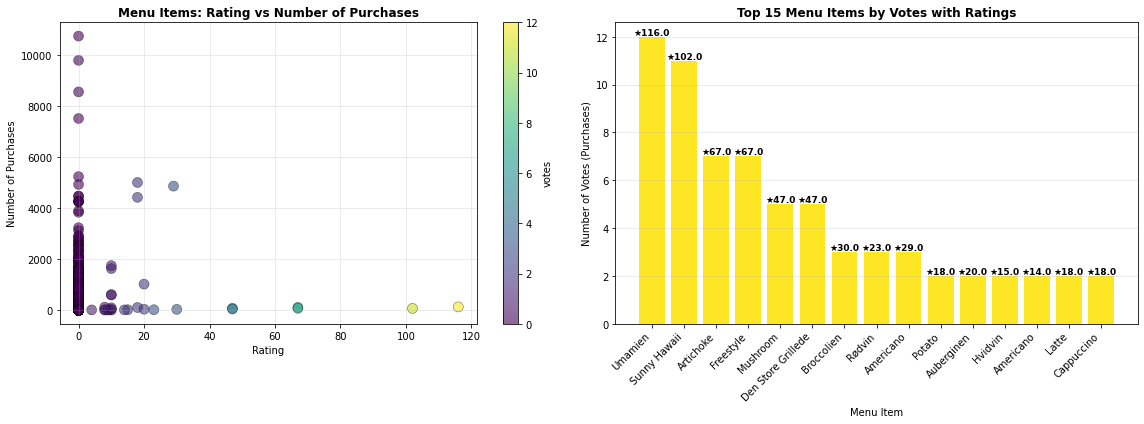


MENU ITEMS ANALYSIS: RATING vs PURCHASES

Total menu items: 30397

Average rating: 0.03
Average votes per item: 0.00

Correlation between rating and votes: 0.999

Top 10 items by votes:
                 title  rating  votes
7              Umamien     116     12
4         Sunny Hawaii     102     11
0            Artichoke      67      7
6            Freestyle      67      7
3             Mushroom      47      5
11  Den Store Grillede      47      5
1           Broccolien      30      3
8               Rødvin      23      3
86           Americano      29      3
2               Potato      18      2


In [ ]:
# Menu Items: Rating vs Purchases (Votes)
import matplotlib.pyplot as plt
import numpy as np

# Use rating and votes columns directly from menu_items_info
menu_data = menu_items_info[['title', 'rating', 'votes','purchases']].copy()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter plot - Rating vs Votes (Purchases)
scatter = ax1.scatter(menu_data["rating"], menu_data["purchases"], 
                     s=100, alpha=0.6, c=menu_data["votes"], 
                     cmap='viridis', edgecolors='black', linewidth=0.5)
ax1.set_title("Menu Items: Rating vs Number of Purchases", fontsize=12, fontweight='bold')
ax1.set_xlabel("Rating")
ax1.set_ylabel("Number of Purchases")
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label="votes")

# Plot 2: Bar plot - Top 15 items by votes with their ratings
top_items = menu_data.nlargest(15, "votes")
x_pos = np.arange(len(top_items))
bars = ax2.bar(x_pos, top_items["votes"], color=plt.cm.viridis(top_items["rating"]/5))
ax2.set_title("Top 15 Menu Items by Votes with Ratings", fontsize=12, fontweight='bold')
ax2.set_xlabel("Menu Item")
ax2.set_ylabel("Number of Votes (Purchases)")
ax2.set_xticks(x_pos)
ax2.set_xticklabels(top_items["title"], rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# Add rating labels on top of bars
for i, (idx, row) in enumerate(top_items.iterrows()):
    ax2.text(i, row["votes"], f"★{row['rating']:.1f}", 
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("MENU ITEMS ANALYSIS: RATING vs PURCHASES")
print("="*70)
print(f"\nTotal menu items: {len(menu_data)}")
print(f"\nAverage rating: {menu_data['rating'].mean():.2f}")
print(f"Average votes per item: {menu_data['votes'].mean():.2f}")
print(f"\nCorrelation between rating and votes: {menu_data['rating'].corr(menu_data['votes']):.3f}")
print("\nTop 10 items by votes:")
print(top_items[['title', 'rating', 'votes']].head(10).to_string())

,Unnamed: 0,id,user_id,created,updated,accounting_reference,delivery,discountable,display_for_customers,eat_in,...,status,takeaway,title,trainee_mode,type,vat,add_on_category_ids,printer_category_ids,standard_voucher_validity,all_you_can_eat_validity
0,0,59837,423,1/17/2021 9:03,6/26/2024 15:41,0,1,1,0,1,...,Active,1,The Classic,0,Normal,25.0,61551|61554|61562|61571|61575|61580,0,0,0
1,1,59838,423,1/17/2021 9:05,6/26/2024 15:41,0,1,1,0,1,...,Active,1,The Rudimental,0,Normal,25.0,61551|61554|61562|61571|61575|61580,0,0,0
2,2,59839,423,1/17/2021 9:07,6/26/2024 15:41,0,1,1,0,1,...,Active,1,The Garden,0,Normal,25.0,61551|61554|61562|61571|61575|61580,0,0,0
3,3,59843,423,1/17/2021 9:17,3/5/2025 5:33,0,1,1,0,1,...,Active,1,The Double,0,Normal,25.0,61566|61551|61554|61562|61571|61575|61580,0,365,0
4,4,59856,423,1/17/2021 9:31,6/26/2024 15:41,0,1,1,0,1,...,Active,1,"Coca Cola 0,33 l",0,Normal,25.0,0,0,0,0


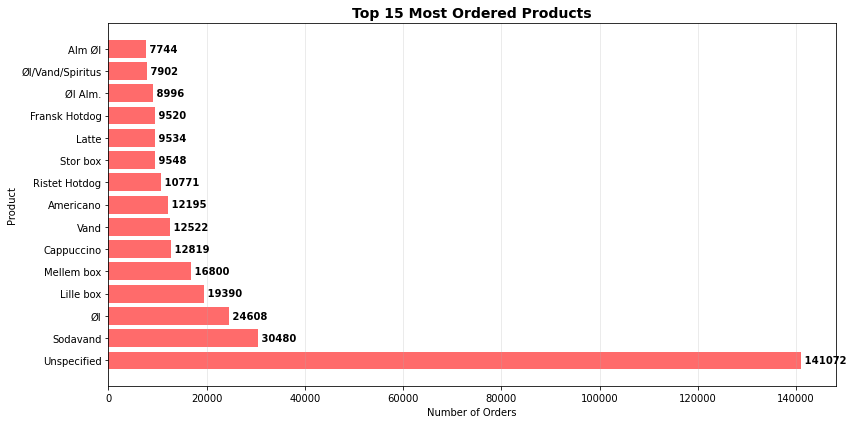


Top 15 Most Ordered Products:
                  title  order_count
17810       Unspecified       141072
15550          Sodavand        30480
19023                Øl        24608
10420         Lille box        19390
11205        Mellem box        16800
3755         Cappuccino        12819
17881              Vand        12522
2010          Americano        12195
14038     Ristet Hotdog        10771
16485          Stor box         9548
10243             Latte         9534
6567      Fransk Hotdog         9520
19039           Øl Alm.         8996
19070  Øl/Vand/Spiritus         7902
1906             Alm Øl         7744


In [ ]:
# Most Ordered Products
import matplotlib.pyplot as plt

# Group by title and count orders
most_ordered_products = order_items_info.groupby("title").size().reset_index(name="order_count").sort_values("order_count", ascending=False).head(15)

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(most_ordered_products["title"], most_ordered_products["order_count"], color='#FF6B6B')
ax.set_title("Top 15 Most Ordered Products", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Orders")
ax.set_ylabel("Product")
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, row) in enumerate(most_ordered_products.iterrows()):
    ax.text(row["order_count"], i, f" {row['order_count']}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 15 Most Ordered Products:")
print(most_ordered_products.to_string())

In [ ]:
#old dataset loader
old_data_loader = DataLoader("D:\Deloitte\DIH-X-AUC-Hackathon\data\Old data")
df = old_data_loader.load_csv("fct_orders.csv")
places_info.columns.tolist()

d:\Deloitte\DIH-X-AUC-Hackathon\src\models\data_loader.py:56: DtypeWarning: Columns (10,17,18,26,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=parse_dates)


Successfully loaded fct_orders.csv: 399810 rows


['Unnamed: 0',
 'place_id',
 'user_id',
 'created',
 'updated',
 'title',
 'activated',
 'active',
 'bankrupt',
 'binding_period',
 'contact_email',
 'contact_mobile_phone',
 'country',
 'currency',
 'duplicate',
 'ecommerce_fee',
 'eu_commission',
 'invoicing_start_date',
 'isv_commission',
 'isv_partner',
 'non_eu_commission',
 'onboarded_by',
 'processing_fee',
 'sales_stage',
 'service_charge',
 'termination_date',
 'transferred_contract',
 'type_id',
 'contact_name',
 'cuisine_ids',
 'trainee_mode',
 'demo_mode',
 'default_order_type_cashier',
 'default_order_type_customer',
 'show_bestsellers',
 'use_quick_search',
 'display_cashier_images',
 'display_created_by',
 'use_customer_facing_display',
 'timezone',
 'contact_language',
 'suppress_receipt_prompt',
 'print_on_acceptance',
 'enable_receipt_download',
 'enable_email_receipts',
 'daily_sales_reports',
 'monthly_sales_reports',
 'phone',
 'email',
 'takeaway_link',
 'delivery_link',
 'opening_hours',
 'enable_cashback',
 'ena

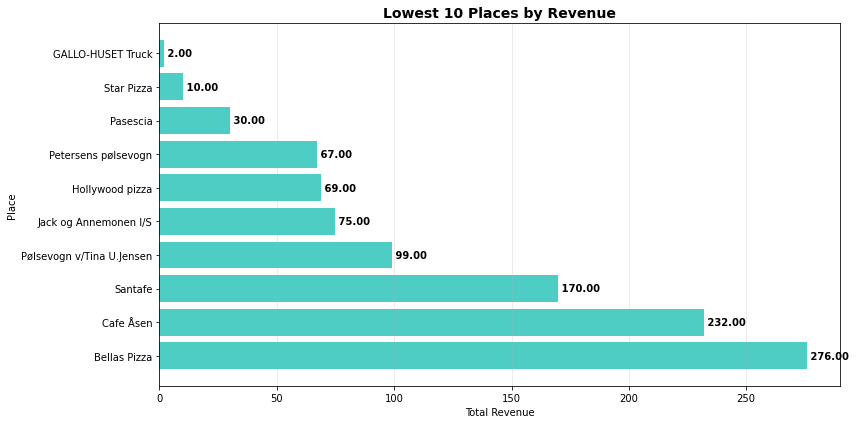


Top 15 Places by Revenue:
     place_id  total_amount                      title
108  617902.0         276.0               Bellas Pizza
15   431266.0         232.0                  Cafe Åsen
121  766639.0         170.0                    Santafe
7    416997.0          99.0  Pølsevogn v/Tina U.Jensen
98   591448.0          75.0      Jack og Annemonen I/S
102  595624.0          69.0            Hollywood pizza
50   477971.0          67.0        Petersens pølsevogn
45   467942.0          30.0                   Pasescia
110  622882.0          10.0                 Star Pizza
16   431556.0           2.0          GALLO-HUSET Truck


In [ ]:
# Top Places by Revenue
import matplotlib.pyplot as plt
available_place_ids = places_info['place_id'].unique()
orders_with_places = orders_info[orders_info['place_id'].isin(available_place_ids)]
top_places_revenue = orders_with_places.groupby("place_id")["total_amount"].sum().reset_index().sort_values("total_amount", ascending=False).tail(10)
top_places_revenue["title"] = top_places_revenue["place_id"].map(places_info.set_index("place_id")["title"])
# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(top_places_revenue["title"], top_places_revenue["total_amount"], color='#4ECDC4')
ax.set_title("Lowest 10 Places by Revenue", fontsize=14, fontweight='bold')
ax.set_xlabel("Total Revenue")
ax.set_ylabel("Place")
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (idx, row) in enumerate(top_places_revenue.iterrows()):
    ax.text(row["total_amount"], i, f" {row['total_amount']:.2f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 15 Places by Revenue:")
print(top_places_revenue.to_string())

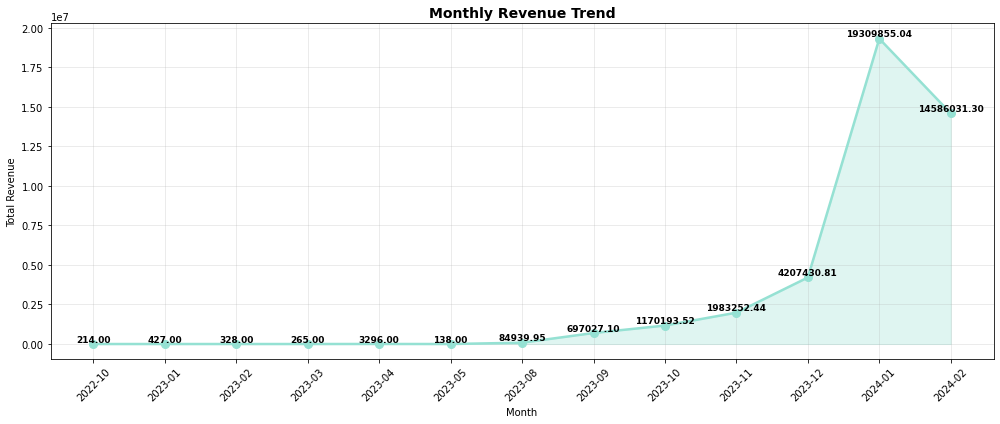


Monthly Revenue Trend:
      month  total_amount
0   2022-10        214.00
1   2023-01        427.00
2   2023-02        328.00
3   2023-03        265.00
4   2023-04       3296.00
5   2023-05        138.00
6   2023-08      84939.95
7   2023-09     697027.10
8   2023-10    1170193.52
9   2023-11    1983252.44
10  2023-12    4207430.81
11  2024-01   19309855.04
12  2024-02   14586031.30


In [ ]:
# Monthly Revenue Trend
import matplotlib.pyplot as plt
import pandas as pd

# Convert order timestamp to datetime and extract month
orders_info['order_date'] = pd.to_datetime(orders_info['created'])
orders_info['month'] = orders_info['order_date'].dt.to_period('M')

# Group by month and sum revenue
monthly_revenue = orders_info.groupby("month")["total_amount"].sum().reset_index()
monthly_revenue['month'] = monthly_revenue['month'].astype(str)

# Create line plot with markers
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(monthly_revenue["month"], monthly_revenue["total_amount"], marker='o', linewidth=2.5, markersize=8, color='#95E1D3')
ax.fill_between(range(len(monthly_revenue)), monthly_revenue["total_amount"], alpha=0.3, color='#95E1D3')
ax.set_title("Monthly Revenue Trend", fontsize=14, fontweight='bold')
ax.set_xlabel("Month")
ax.set_ylabel("Total Revenue")
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Add value labels on points
for i, (idx, row) in enumerate(monthly_revenue.iterrows()):
    ax.text(i, row["total_amount"], f"{row['total_amount']:.2f}", 
            ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\nMonthly Revenue Trend:")
print(monthly_revenue.to_string())

In [ ]:
average_order_per_user = users_info['orders'].mean()
df = users_info.query("orders < @average_order_per_user")
df[['id']].to_csv("D:/Deloitte/DIH-X-AUC-Hackathon/Inventory Management business analysis/exports_of_datasets/uninterested_users.csv", index=False)